___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Aggregation & Groupby

The ``groupby`` method allows you to group rows of data together and call aggregate functions

### Basic aggregation methods:

* ``count()``
* ``mean()``
* ``median()``
* ``min()``
* ``max()``
* ``std()``
* ``var()``
* ``sum()``


In [191]:
import seaborn as sns
import pandas as pd
import numpy as np

 - # ``df.groupby()``

In [192]:
df = sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [193]:
df['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [194]:
df.groupby("method")[["distance"]].mean()

,distance
method,
Astrometry,17.875000
Eclipse Timing Variations,315.360000
Imaging,67.715937
Microlensing,4144.000000
Orbital Brightness Modulation,1180.000000
Pulsar Timing,1200.000000
Pulsation Timing Variations,NaN
Radial Velocity,51.600208
Transit,599.298080


In [195]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [196]:
df.year.unique()

array([2006, 2008, 2011, 2007, 2009, 2002, 1996, 2010, 2001, 1995, 2004,
       2012, 2013, 2005, 2000, 2003, 1997, 1999, 2014, 1998, 1989, 1992,
       1994], dtype=int64)

 - # ``DataFrame`` Operations

**Map / Replace**

In [197]:
data = {'Company':['GOOGLE', 'GOOGLE', 'MICROSOFT', 'MICROSOFT', 'FACE', 'FACE'],
       'Person':['PB', 'Chandler', 'Ross', 'Joey', 'Rachel', 'Monica'],
       'Sales':[100, 140, 150, 99, 102, 110]}

In [198]:
df1=pd.DataFrame(data)

In [199]:
df1

,Company,Person,Sales
0,GOOGLE,PB,100
1,GOOGLE,Chandler,140
2,MICROSOFT,Ross,150
3,MICROSOFT,Joey,99
4,FACE,Rachel,102
5,FACE,Monica,110


In [200]:
df1.Company.map({'GOOGLE':'GOO','MICROSOFT':'MIC','FACE':'FB'})

0    GOO
1    GOO
2    MIC
3    MIC
4     FB
5     FB
Name: Company, dtype: object

In [201]:
my_map={'GOOGLE':'GOO','MICROSOFT':'MIC','FACE':'FB'}

In [202]:
df_m=df1.copy()

In [203]:
df_m.Company=df_m.Company.map(my_map)

In [204]:
df_m

,Company,Person,Sales
0,GOO,PB,100
1,GOO,Chandler,140
2,MIC,Ross,150
3,MIC,Joey,99
4,FB,Rachel,102
5,FB,Monica,110


In [205]:
df_m['Sales']=df_m.Sales.map(lambda x: x*1000)
df_m

,Company,Person,Sales
0,GOO,PB,100000
1,GOO,Chandler,140000
2,MIC,Ross,150000
3,MIC,Joey,99000
4,FB,Rachel,102000
5,FB,Monica,110000


In [206]:
df_m['Company'].replace(to_replace='GOO',value='Google')

0    Google
1    Google
2       MIC
3       MIC
4        FB
5        FB
Name: Company, dtype: object

In [207]:
df_m.Company.replace({'MIC':'MICRO','FB':'FACE'})

0      GOO
1      GOO
2    MICRO
3    MICRO
4     FACE
5     FACE
Name: Company, dtype: object

- ### `.aggregate()`
- ### `.filter()`
- ### `.transform()`
- ### `.apply()`
- ### `.pivot_table()`

In [208]:
df2 = pd.DataFrame({'groups': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'var1': [10,20,30,50,52,100],
                   'var2': [100,200,300,500,500,700]})
df2

,groups,var1,var2
0,A,10,100
1,B,20,200
2,C,30,300
3,A,50,500
4,B,52,500
5,C,100,700


### ``.aggregate()``

In [209]:
df2.groupby('groups').mean()

,var1,var2
groups,,
A,30.0,300.0
B,36.0,350.0
C,65.0,500.0


In [210]:
df2.groupby('groups').aggregate([np.min,np.median,np.max])

var1             var2            
       amin median amax amin median amax
groups                                  
A        10   30.0   50  100  300.0  500
B        20   36.0   52  200  350.0  500
C        30   65.0  100  300  500.0  700

In [211]:
df2.groupby('groups').agg([min,'median',max])

var1             var2            
        min median  max  min median  max
groups                                  
A        10   30.0   50  100  300.0  500
B        20   36.0   52  200  350.0  500
C        30   65.0  100  300  500.0  700

In [212]:
df2.groupby('groups').aggregate({'var1':('min','max') , 'var2':'median'})

var1        var2
        min  max median
groups                 
A        10   50  300.0
B        20   52  350.0
C        30  100  500.0

### ``.filter()``

In [213]:
df3 = pd.DataFrame({'groups': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'var1': [10,20,30,50,52,100],
                   'var2': [100,200,300,500,500,700]})
df3

,groups,var1,var2
0,A,10,100
1,B,20,200
2,C,30,300
3,A,50,500
4,B,52,500
5,C,100,700


In [214]:
df3.groups.unique()

array(['A', 'B', 'C'], dtype=object)

In [215]:
def filter_func(x):
    return x["var1"].mean() < 36

In [216]:
df3.groupby("groups").mean()

,var1,var2
groups,,
A,30.0,300.0
B,36.0,350.0
C,65.0,500.0


In [217]:
# returns the rows that meet the condition, as a DataFrame
df3.groupby('groups').filter(filter_func)

,groups,var1,var2
0,A,10,100
3,A,50,500


In [218]:
df3.groupby('groups').filter(lambda x : x['var2'].sum()<800)

,groups,var1,var2
0,A,10,100
1,B,20,200
3,A,50,500
4,B,52,500


### ``.transform()``

In [219]:
df8 = pd.DataFrame({'groups': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'var1': [10,20,30,50,52,100],
                   'var2': [100,200,300,500,500,700]})
df8

,groups,var1,var2
0,A,10,100
1,B,20,200
2,C,30,300
3,A,50,500
4,B,52,500
5,C,100,700


In [220]:
df8.groupby('groups').transform('mean')

,var1,var2
0,30.0,300.0
1,36.0,350.0
2,65.0,500.0
3,30.0,300.0
4,36.0,350.0
5,65.0,500.0


### ``.apply()``

In [221]:
df9 = pd.DataFrame({'groups': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'var1': [10,20,30,50,52,100],
                   'var2': [100,200,300,500,500,700]})
df9

,groups,var1,var2
0,A,10,100
1,B,20,200
2,C,30,300
3,A,50,500
4,B,52,500
5,C,100,700


In [222]:
df9.apply(np.sum)

groups    ABCABC
var1         262
var2        2300
dtype: object

In [223]:
df9.var1.sum()

262

In [224]:
df_numeric = df9.iloc[:,1:3]

In [225]:
df_numeric

,var1,var2
0,10,100
1,20,200
2,30,300
3,50,500
4,52,500
5,100,700


In [226]:
df_numeric.apply(np.mean, axis=1)

0     55.0
1    110.0
2    165.0
3    275.0
4    276.0
5    400.0
dtype: float64

In [227]:
df9.groupby('groups').apply(np.mean)

C:\Users\igdem\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3370: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,var1,var2
groups,,
A,30.0,300.0
B,36.0,350.0
C,65.0,500.0


### `df.transform() vs df.apply()`

In [228]:
df10 = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz'],
                    'col4':['AbC','dh','Dh','ASD']})
df10

,col1,col2,col3,col4
0,1,444,abc,AbC
1,2,555,def,dh
2,3,666,ghi,Dh
3,4,444,xyz,ASD


In [229]:
df10["col4"].transform(len)

0    3
1    2
2    2
3    3
Name: col4, dtype: int64

In [230]:
#returns the length of each variable (columns) separately
df10["col4"].apply(len)

0    3
1    2
2    2
3    3
Name: col4, dtype: int64

In [231]:
df1 = pd.DataFrame([["a", 9, 25]] * 4, columns=["grp", 'P', 'Q'])
df2 = pd.DataFrame([["b", 9, 25]] * 3, columns=["grp", 'P', 'Q'])
df3 = pd.concat([df1, df2], ignore_index=True)
df3

,grp,P,Q
0,a,9,25
1,a,9,25
2,a,9,25
3,a,9,25
4,b,9,25
5,b,9,25
6,b,9,25


In [232]:
# returns a DataFrame that does not have the same length as itself
df3.groupby("grp").apply(sum)

,grp,P,Q
grp,,,
a,aaaa,36,100
b,bbb,27,75


In [233]:
df3.groupby("grp").transform(sum)

,P,Q
0,36,100
1,36,100
2,36,100
3,36,100
4,27,75
5,27,75
6,27,75


### Pivot Tables

In [234]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [235]:
titanic.groupby(["sex","class"])[["survived"]].mean()

survived
sex    class           
female First   0.968085
       Second  0.921053
       Third   0.500000
male   First   0.368852
       Second  0.157407
       Third   0.135447

In [236]:
titanic.groupby(["sex","class"])[["survived"]].aggregate("mean").unstack()

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

### Using pivot table

- Create a spreadsheet-style pivot table as a ``DataFrame``.

In [237]:
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# Concatenating, Merging, and Joining 

 - **Concat** gives the flexibility to join based on the axis( all rows or all columns)

 - **Append** is the specific case(axis=0, join='outer') of concat

 - **Join** is based on the indexes (set by set_index)/key columns on how variable =['left','right','inner','outer']

 - **Merge** is based on any particular column each of the two dataframes, this columns are variables on like 'left_on', 'right_on', 'on'

In [238]:
df_r = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                     'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']})
   
df_l = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                          'A': ['C0', 'C1', 'C2'],
                          'D': ['D0', 'D1', 'D2']})  

In [239]:
pd.concat([df_l,df_r], axis=0, ignore_index=True)

,key,A,D,B
0,K0,C0,D0,NaN
1,K1,C1,D1,NaN
2,K2,C2,D2,NaN
3,K0,A0,NaN,B0
4,K1,A1,NaN,B1
5,K2,A2,NaN,B2


In [240]:
pd.concat([df_l,df_r], axis=1)

,key,A,D,key,A,B
0,K0,C0,D0,K0,A0,B0
1,K1,C1,D1,K1,A1,B1
2,K2,C2,D2,K2,A2,B2


# Merge

In [241]:
df_r

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2


In [242]:
df_l

,key,A,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2


In [243]:
pd.merge(df_l,df_r,on='key')

,key,A_x,D,A_y,B
0,K0,C0,D0,A0,B0
1,K1,C1,D1,A1,B1
2,K2,C2,D2,A2,B2


In [244]:
new_df=pd.DataFrame(data=[['K2','A2','B2']],columns=['key','A','D'])

In [245]:
new_df

,key,A,D
0,K2,A2,B2


In [246]:
df_l1=df_l.append(new_df,ignore_index=True)
df_l1

,key,A,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K2,A2,B2


In [247]:
#df_l.insert(3,'E',['K3','A3','B4'])
#df_l

In [248]:
pd.merge(df_l1,df_r,on='A')

,key_x,A,D,key_y,B
0,K2,A2,B2,K2,B2


In [249]:
pd.merge(df_l1,df_r,on=['A','key'])

,key,A,D,B
0,K2,A2,B2,B2


# Join

In [250]:
df_l.join(df_r,lsuffix='_left',rsuffix='right')

,key_left,A_left,D,keyright,Aright,B
0,K0,C0,D0,K0,A0,B0
1,K1,C1,D1,K1,A1,B1
2,K2,C2,D2,K2,A2,B2


In [251]:
df_l.join(df_r.set_index('key'),on='key',lsuffix='_left',rsuffix='_right')

,key,A_left,D,A_right,B
0,K0,C0,D0,A0,B0
1,K1,C1,D1,A1,B1
2,K2,C2,D2,A2,B2


In [252]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index = ['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index = ['K0', 'K2', 'K3'])

In [253]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [254]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [255]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


# Missing Values & Outliers

- # Handling with Missing Values

**Missing value handling methods**

 1. <b>Deleting Rows</b> ----->if it has more than 70-75% of missing values
    
 2. <b>Replacing With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

NaN, standing for not a number, is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

NaN is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [256]:
import numpy as np
import pandas as pd
V1 = np.array([2,4,6,np.NaN,7,1,np.NaN,10,14])
V2 = np.array([8,np.NaN,5,8,11,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,11,8,5,10,6,np.NaN,4,20])
df = pd.DataFrame(
        {"Var1" : V1,
         "Var2" : V2,
         "Var3" : V3}        
)

df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,4.0,NaN,11.0
2,6.0,5.0,8.0
3,NaN,8.0,5.0
4,7.0,11.0,10.0
5,1.0,NaN,6.0
6,NaN,NaN,NaN
7,10.0,2.0,4.0
8,14.0,3.0,20.0


In [257]:
#number of missing values in the columns
df.isnull().sum()

Var1    2
Var2    3
Var3    2
dtype: int64

In [258]:
# what percent of the variables have missing values
df.isnull().sum()/len(df)

Var1    0.222222
Var2    0.333333
Var3    0.222222
dtype: float64

In [259]:
# columns/variables containing any missing values
df.isnull().any()

Var1    True
Var2    True
Var3    True
dtype: bool

### Missing Values Handling Methods

 - #### Dropping

In [260]:
df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,4.0,NaN,11.0
2,6.0,5.0,8.0
3,NaN,8.0,5.0
4,7.0,11.0,10.0
5,1.0,NaN,6.0
6,NaN,NaN,NaN
7,10.0,2.0,4.0
8,14.0,3.0,20.0


In [261]:
# index 6 is removed since its all values are missing.
df.dropna(how = "all")

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,4.0,NaN,11.0
2,6.0,5.0,8.0
3,NaN,8.0,5.0
4,7.0,11.0,10.0
5,1.0,NaN,6.0
7,10.0,2.0,4.0
8,14.0,3.0,20.0


In [262]:
# it removes the columns which contains any (at least one missing value)
# missing value
df.dropna(axis = 1)

""
0
1
2
3
4
5
6
7
8


In [263]:
# there is no dropping column since no column has full of missing value
df.dropna(axis = 1, how = "all")

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,4.0,NaN,11.0
2,6.0,5.0,8.0
3,NaN,8.0,5.0
4,7.0,11.0,10.0
5,1.0,NaN,6.0
6,NaN,NaN,NaN
7,10.0,2.0,4.0
8,14.0,3.0,20.0


 - #### Filling

In [264]:
import numpy as np
import pandas as pd
V1 = np.array([2,3,5,np.NaN,7,1,np.NaN,10,14])
V2 = np.array([8,np.NaN,5,8,11,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,13,5,6,13,7,np.NaN,3,30])
df = pd.DataFrame(
        {"Var1" : V1,
         "Var2" : V2,
         "Var3" : V3}        
)

df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [265]:
df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


 - Filling with a specific value

In [266]:
df["Var1"].fillna(0)

0     2.0
1     3.0
2     5.0
3     0.0
4     7.0
5     1.0
6     0.0
7    10.0
8    14.0
Name: Var1, dtype: float64

 - Filling with any Proper Value

In [267]:
df["Var1"].mean()

6.0

In [268]:
df["Var1"].fillna(df["Var1"].mean())

0     2.0
1     3.0
2     5.0
3     6.0
4     7.0
5     1.0
6     6.0
7    10.0
8    14.0
Name: Var1, dtype: float64

In [269]:
# filling all columns/variables using Method - 1

df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,Var1,Var2,Var3
0,2.0,8.000000,11.0
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


In [270]:
# filling all columns/variables using Method - 2
df.mean()

Var1     6.000000
Var2     6.166667
Var3    11.000000
dtype: float64

In [271]:
df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [272]:
df.fillna(df.mean())

,Var1,Var2,Var3
0,2.0,8.000000,11.0
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


In [273]:
# we can fill Var1 with avg of Var1 and fill Var2 with avg of Var2
df.mean()["Var1":"Var2"]

Var1    6.000000
Var2    6.166667
dtype: float64

In [274]:
df.fillna(df.mean()["Var1":"Var2"])

,Var1,Var2,Var3
0,2.0,8.000000,NaN
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


In [275]:
df["Var3"].fillna(df["Var3"].median())

0     7.0
1    13.0
2     5.0
3     6.0
4    13.0
5     7.0
6     7.0
7     3.0
8    30.0
Name: Var3, dtype: float64

In [276]:
df

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [277]:
pd.notna(df)

,Var1,Var2,Var3
0,True,True,False
1,True,False,True
2,True,True,True
3,False,True,True
4,True,True,True
5,True,False,True
6,False,False,False
7,True,True,True
8,True,True,True


In [278]:
df.where(pd.notna(df), df.mean(), axis = 1)

,Var1,Var2,Var3
0,2.0,8.000000,11.0
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


 - Filling with any Proper Value Regarding to Group of the Categorical Variables 

In [279]:
Var1 = np.array([2,3,5,np.NaN,7,8,9,np.NaN,15])
Var2 = np.array([6,np.NaN,7,10,12,np.NaN,np.NaN,22,33])
Var3 = np.array([np.NaN,10,13,12,14,19,np.NaN,25,35])
Var4 = np.array(["DS","DS","DS","FS","AWS","FS","FS","AWS","AWS"])

df = pd.DataFrame(
        {"salary" : Var1,
         "Var2" : Var2,
         "Var3" : Var3,
         "department" : Var4}        
)

df

,salary,Var2,Var3,department
0,2.0,6.0,NaN,DS
1,3.0,NaN,10.0,DS
2,5.0,7.0,13.0,DS
3,NaN,10.0,12.0,FS
4,7.0,12.0,14.0,AWS
5,8.0,NaN,19.0,FS
6,9.0,NaN,NaN,FS
7,NaN,22.0,25.0,AWS
8,15.0,33.0,35.0,AWS


In [280]:
#regarding to avg of "salary" in terms of "department"

df.groupby("department")["salary"].mean()

department
AWS    11.000000
DS      3.333333
FS      8.500000
Name: salary, dtype: float64

In [281]:
# we transformed the values of "salary" column into group average.

df.groupby("department")["salary"].transform("mean")  # take a look at the .transform()

0     3.333333
1     3.333333
2     3.333333
3     8.500000
4    11.000000
5     8.500000
6     8.500000
7    11.000000
8    11.000000
Name: salary, dtype: float64

In [282]:
df

,salary,Var2,Var3,department
0,2.0,6.0,NaN,DS
1,3.0,NaN,10.0,DS
2,5.0,7.0,13.0,DS
3,NaN,10.0,12.0,FS
4,7.0,12.0,14.0,AWS
5,8.0,NaN,19.0,FS
6,9.0,NaN,NaN,FS
7,NaN,22.0,25.0,AWS
8,15.0,33.0,35.0,AWS


In [283]:
df["salary"].fillna(df.groupby("department")["salary"].transform("mean"))


0     2.0
1     3.0
2     5.0
3     8.5
4     7.0
5     8.0
6     9.0
7    11.0
8    15.0
Name: salary, dtype: float64

 - Filling the Missing Values of Categorical Values

In [284]:
import numpy as np
import pandas as pd
V1 = np.array([5,9,16,np.NaN,17,21,np.NaN,29,35])
V4 = np.array(["FS",np.nan,"DS","DS","DS","FS",np.nan,"AWS","AWS"], dtype=object)

df = pd.DataFrame(
        {"salary" : V1,
        "department" : V4}        
)

df

,salary,department
0,5.0,FS
1,9.0,NaN
2,16.0,DS
3,NaN,DS
4,17.0,DS
5,21.0,FS
6,NaN,NaN
7,29.0,AWS
8,35.0,AWS


In [285]:
df["department"].fillna(df["department"].mode()[0])

0     FS
1     DS
2     DS
3     DS
4     DS
5     FS
6     DS
7    AWS
8    AWS
Name: department, dtype: object

In [286]:
df

,salary,department
0,5.0,FS
1,9.0,NaN
2,16.0,DS
3,NaN,DS
4,17.0,DS
5,21.0,FS
6,NaN,NaN
7,29.0,AWS
8,35.0,AWS


In [287]:
df["department"].fillna(method = "bfill")

0     FS
1     DS
2     DS
3     DS
4     DS
5     FS
6    AWS
7    AWS
8    AWS
Name: department, dtype: object

In [288]:
df["department"].fillna(method = "ffill")

0     FS
1     FS
2     DS
3     DS
4     DS
5     FS
6     FS
7    AWS
8    AWS
Name: department, dtype: object

In [289]:
df

,salary,department
0,5.0,FS
1,9.0,NaN
2,16.0,DS
3,NaN,DS
4,17.0,DS
5,21.0,FS
6,NaN,NaN
7,29.0,AWS
8,35.0,AWS


In [290]:
df.interpolate()
#look at numerical columns NaNs

,salary,department
0,5.0,FS
1,9.0,NaN
2,16.0,DS
3,16.5,DS
4,17.0,DS
5,21.0,FS
6,25.0,NaN
7,29.0,AWS
8,35.0,AWS


 - # Handling with Outliers

<b>Outliers</b> are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. ... Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in misleading interpretations. In this case, the mean value makes it seem that the data values are higher than they really are

## Catching and Detecting Outliers

In [291]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


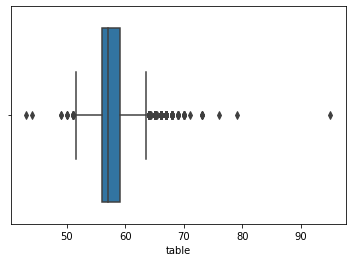

In [292]:
# you don't need to know how this plotting happens.
# just focus on quarters
# remember Statistics lesson IQR

sns.boxplot(x = df.table);

In [293]:
df_table = df["table"]

## Tukey's Fences | Tukey's Rule

- First way of specifying ``Q1 & Q3`` is using the ``.quantile()`` method

In [294]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [295]:
Q1

56.0

In [296]:
Q3

59.0

In [297]:
IQR

3.0

- Second way of specifying ``Q1 & Q3`` is using the ``.describe()`` method

In [298]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [299]:
lower_lim

51.5

In [300]:
upper_lim

63.5

In [301]:
outliers_15_low = (df_table < lower_lim)

In [302]:
outliers_15_up = (df_table > upper_lim)

In [303]:
len(df_table[outliers_15_low])

16

In [304]:
len(df_table[outliers_15_up])

589

In [305]:
len(df_table) - (len(df_table[outliers_15_low]) + len(df_table[outliers_15_up]))

53335

In [306]:
# the outliers according to the 1.5 

df_table[(outliers_15_low | outliers_15_up)]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [307]:
lower_lim = Q1 - 2.5 * IQR
upper_lim = Q3 + 2.5 * IQR

In [308]:
lower_lim

48.5

In [309]:
upper_lim

66.5

In [310]:
outliers_25 = (df_table < lower_lim) | (df_table > upper_lim)

In [311]:
# the outliers according to the 2.5 

df_table[outliers_25]

91       69.0
227      67.0
314      70.0
359      68.0
526      67.0
         ... 
52860    73.0
52861    73.0
53064    68.0
53542    67.0
53660    67.0
Name: table, Length: 91, dtype: float64

### Removing the Outliers

In [312]:
# "table" column without outliers

df_table[~(outliers_15_low | outliers_15_up)]

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53335, dtype: float64

In [313]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

not_outliers_15 = (df_table >= lower_lim) & (df_table <= upper_lim)

In [314]:
df_table[not_outliers_15]

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53335, dtype: float64

In [315]:
cleaned_df = df[not_outliers_15]

In [316]:
cleaned_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


### Limitation and Transformation of the Outliers

- ### Limitation using ``.winsorize()`` method

In [317]:
from scipy.stats.mstats import winsorize

In [318]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [319]:
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

<AxesSubplot:xlabel='table'>

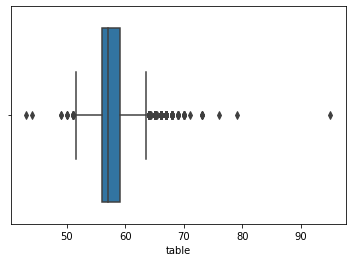

In [320]:
sns.boxplot(x = df_table)

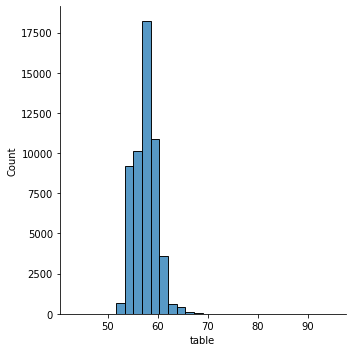

In [321]:
sns.displot(df_table, bins = 30, kde = False);

In [322]:
df_table_win = winsorize(df_table, (0.01, 0.02))

In [323]:
df_table_win

masked_array(data=[55., 61., 63., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

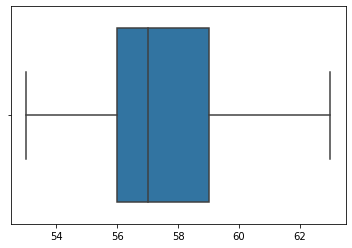

In [324]:
sns.boxplot(x = df_table_win);

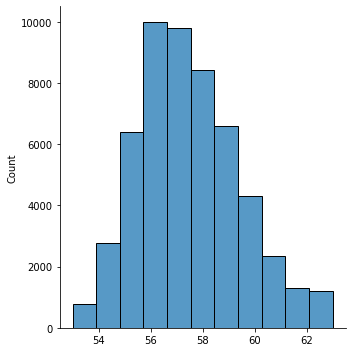

In [325]:
sns.displot(df_table_win, bins = 11, kde =False)

In [326]:
pd.DataFrame(df_table_win)

,0
0,55.0
1,61.0
2,63.0
3,58.0
4,58.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [327]:
pd.DataFrame(df_table_win)[0]

0        55.0
1        61.0
2        63.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: 0, Length: 53940, dtype: float64

In [328]:
df_table_win = pd.DataFrame(df_table_win)[0]

In [329]:
df_table_win.describe()

count    53940.000000
mean        57.434607
std          2.142774
min         53.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.000000
Name: 0, dtype: float64

In [330]:
df_table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [331]:
df_table.sort_values().head(20)

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
7418     50.0
3238     50.1
45798    51.0
33586    51.0
46040    51.0
26387    51.0
3979     51.0
8853     51.0
4150     51.0
1515     51.0
47630    51.0
24815    51.6
15858    52.0
25607    52.0
5144     52.0
Name: table, dtype: float64

In [332]:
df_table_win.sort_values().head(20)

35246    53.0
42958    53.0
34901    53.0
5207     53.0
31688    53.0
31689    53.0
7838     53.0
42921    53.0
34826    53.0
31807    53.0
17608    53.0
31647    53.0
17651    53.0
17658    53.0
26613    53.0
17711    53.0
26585    53.0
46276    53.0
2275     53.0
17736    53.0
Name: 0, dtype: float64

In [333]:
df_table_win[11368]

53.0

In [334]:
df_table_win[5144]

53.0

In [335]:
df_table_win[df_table_win == 53]

115      53.0
243      53.0
593      53.0
612      53.0
630      53.0
         ... 
53657    53.0
53688    53.0
53706    53.0
53771    53.0
53881    53.0
Name: 0, Length: 643, dtype: float64

In [336]:
df_table[df_table == 53]

115      53.0
593      53.0
612      53.0
630      53.0
734      53.0
         ... 
53578    53.0
53657    53.0
53706    53.0
53771    53.0
53881    53.0
Name: table, Length: 567, dtype: float64

In [337]:
df_table_win[df_table_win == 63]

2        63.0
43       63.0
91       63.0
122      63.0
145      63.0
         ... 
53785    63.0
53825    63.0
53828    63.0
53840    63.0
53897    63.0
Name: 0, Length: 1180, dtype: float64

In [338]:
df_table[df_table == 63]

43       63.0
122      63.0
200      63.0
218      63.0
443      63.0
         ... 
53758    63.0
53825    63.0
53828    63.0
53840    63.0
53897    63.0
Name: table, Length: 588, dtype: float64

In [339]:
Q1 = 56.0
Q3 = 59.0

In [340]:
IQR = Q3 - Q1

In [341]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [342]:
lower_lim

51.5

In [343]:
upper_lim

63.5

In [344]:
(df_table_win < lower_lim) | (df_table_win > upper_lim)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: 0, Length: 53940, dtype: bool

In [345]:
outliers_15 = (df_table_win < lower_lim) | (df_table_win > upper_lim)

In [346]:
# the outliers according to the 1.5 
# there is no outliers
df_table[outliers_15]

Series([], Name: table, dtype: float64)

- ### ``log()`` Transformation

In [347]:
#if distribution is skewed use this

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.3 MB


In [349]:
df_carat = df["carat"]

In [350]:
df_carat.shape

(53940,)

In [351]:
df_carat.head()

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

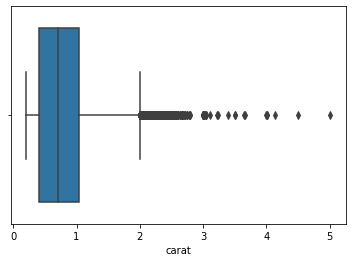

In [352]:
sns.boxplot(x = df_carat);

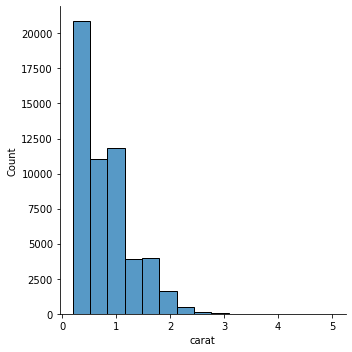

In [353]:
sns.displot(df_carat, bins = 15, kde = False);

In [354]:
df_carat_log = np.log(df_carat)

In [355]:
df_carat_log

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

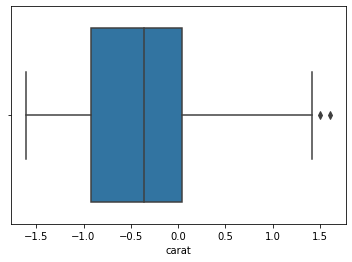

In [356]:
sns.boxplot(x = df_carat_log);

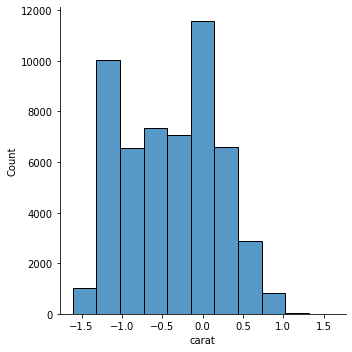

In [357]:
sns.displot(df_carat_log,  bins = 11, kde = False);

In [358]:
Q1 = df_carat.quantile(0.25)
Q3 = df_carat.quantile(0.75)
IQR = Q3-Q1

In [359]:
Q1

0.4

In [360]:
Q3

1.04

In [361]:
IQR

0.64

In [362]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [363]:
lower_lim

-0.5599999999999999

In [364]:
upper_lim

2.0

In [365]:
outliers_15 = (df_carat < lower_lim) | (df_carat > upper_lim)

In [366]:
df_carat[outliers_15]

12246    2.06
13002    2.14
13118    2.15
13757    2.22
13991    2.01
         ... 
27741    2.15
27742    2.04
27744    2.29
27746    2.07
27749    2.29
Name: carat, Length: 1889, dtype: float64

In [367]:
df_carat_log

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

In [368]:
Q1_log = df_carat_log.quantile(0.25)
Q3_log = df_carat_log.quantile(0.75)
IQR_log = Q3_log-Q1_log

In [369]:
lower_lim_log = Q1_log - 1.5 * IQR_log
upper_lim_log = Q3_log + 1.5 * IQR_log

In [370]:
lower_lim_log

-2.3495578994153097

In [371]:
upper_lim_log

1.472487880694436

In [372]:
outliers_15_log = (df_carat_log < lower_lim_log) | (df_carat_log > upper_lim_log)

In [373]:
df_carat[outliers_15_log]

27415    5.01
27630    4.50
Name: carat, dtype: float64

In [374]:
df["carat_log"] = np.log(df["carat"])

In [375]:
df

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [376]:
df.drop("carat", axis=1)

,depth,table,price,x,y,z,carat_log
0,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...
53935,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [377]:
df.drop("carat", axis=1)[outliers_15_log]

,depth,table,price,x,y,z,carat_log
27415,65.5,59.0,18018,10.74,10.54,6.98,1.611436
27630,65.8,58.0,18531,10.23,10.16,6.72,1.504077


In [378]:
df.drop("carat", axis=1)[~outliers_15_log]

,depth,table,price,x,y,z,carat_log
0,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...
53935,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [379]:
cleaned_df = df.drop("carat", axis=1)[~outliers_15_log]

cleaned_df

,depth,table,price,x,y,z,carat_log
0,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...
53935,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


# Example

In [556]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [558]:
df.Age.value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

In [559]:
df.Cabin.value_counts(dropna=False)

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [560]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [561]:
df.groupby('Sex')['Age'].apply(np.mean)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [562]:
df.groupby('Sex')['Age'].transform('mean')

0      30.726645
1      27.915709
2      27.915709
3      27.915709
4      30.726645
         ...    
886    30.726645
887    27.915709
888    27.915709
889    30.726645
890    30.726645
Name: Age, Length: 891, dtype: float64

In [563]:
df['Age1']=df.Age.fillna(df.groupby('Sex')['Age'].transform('mean'))
# df['Age1']=df.Age.fillna(df.groupby('Sex')['Age'].apply(np.mean))

In [564]:
df.Age1.value_counts(dropna=False)

30.726645    124
27.915709     53
24.000000     30
22.000000     27
18.000000     26
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age1, Length: 90, dtype: int64

In [565]:
df.Age1.isnull().sum()

0

In [566]:
df.groupby('Pclass')['Cabin'].value_counts(dropna=False)

Pclass  Cabin      
1       NaN            40
        B96 B98         4
        C23 C25 C27     4
        C22 C26         3
        B18             2
                       ..
3       F G73           2
        E10             1
        F E69           1
        F G63           1
        F38             1
Name: Cabin, Length: 150, dtype: int64

In [567]:
df[df.Pclass==2]['Cabin'].value_counts()

F33     3
E101    3
F2      3
D       3
F4      2
D56     1
E77     1
Name: Cabin, dtype: int64

In [568]:
df.Cabin=df.Cabin.str.extract('(\w{1})')

In [569]:
df.Cabin.value_counts(dropna=False)

NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Cabin, dtype: int64

In [570]:
df.groupby('Pclass')['Cabin'].value_counts(dropna=False)

Pclass  Cabin
1       C         59
        B         47
        NaN       40
        D         29
        E         25
        A         15
        T          1
2       NaN      168
        F          8
        D          4
        E          4
3       NaN      479
        F          5
        G          4
        E          3
Name: Cabin, dtype: int64

In [571]:
df.groupby('Pclass')['Cabin'].value_counts().loc[1].idxmax()

'C'

In [572]:
df.loc[df.Pclass==1,'Cabin']

1      C
3      C
6      E
11     C
23     A
      ..
871    D
872    B
879    C
887    B
889    C
Name: Cabin, Length: 216, dtype: object

In [573]:
for group in list(df.Pclass.unique()):
    df.loc[df.Pclass==group,'Cabin']=df.loc[df.Pclass==group,'Cabin'].fillna(df.groupby('Pclass')['Cabin'].value_counts().loc[group].idxmax())

In [574]:
df.groupby('Pclass')['Cabin'].value_counts(dropna=False)

Pclass  Cabin
1       C         99
        B         47
        D         29
        E         25
        A         15
        T          1
2       F        176
        D          4
        E          4
3       F        484
        G          4
        E          3
Name: Cabin, dtype: int64

In [575]:
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [576]:
df.Name=df.Name.str.split('(').str[0]

In [577]:
df.Name

0                       Braund, Mr. Owen Harris
1                   Cumings, Mrs. John Bradley 
2                        Heikkinen, Miss. Laina
3                 Futrelle, Mrs. Jacques Heath 
4                      Allen, Mr. William Henry
                         ...                   
886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [578]:
df.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [579]:
df.Ticket=df.Ticket.str.extract('(\d{4,7})')

In [580]:
df.Ticket

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
886     211536
887     112053
888       6607
889     111369
890     370376
Name: Ticket, Length: 891, dtype: object

In [581]:
df.Sex=['M' if x=='male' else 'F' for x in df.Sex]

In [582]:
df.Sex

0      M
1      F
2      F
3      F
4      M
      ..
886    M
887    F
888    F
889    M
890    M
Name: Sex, Length: 891, dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

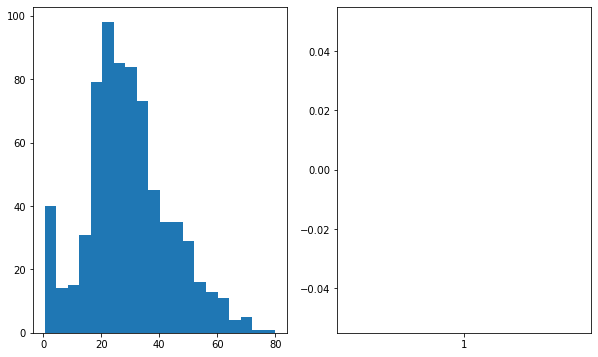

In [583]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.Age, bins=20)

plt.subplot(122)
plt.boxplot(df.Age, whis=3)

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

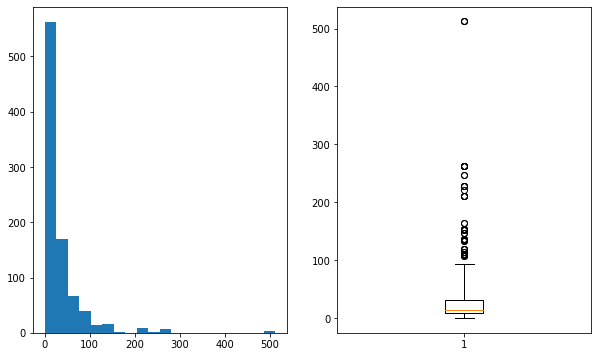

In [584]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.Fare, bins=20)

plt.subplot(122)
plt.boxplot(df.Fare, whis=3)

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

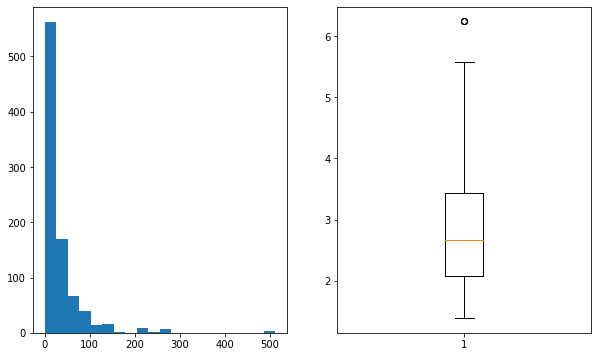

In [587]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.Fare, bins=20)

plt.subplot(122)
plt.boxplot(np.log(df.Fare), whis=2)

plt.show()